In [1]:
from auxiliary_functions.networkx_utilities import create_graph, visualize_graph
from auxiliary_functions.generalized_ext_network import aggregate_cut_time_points, create_A_inf
from auxiliary_functions.min_cut_LP import min_cut_over_time
import itertools
import pandas as pd

Das Netwerk

In [2]:
arcs = [(1, 2), (1, 3), (2, 4), (3, 4), (2, 3)]  # Arcs in the network
capacities = {(1, 2): 1, (1, 3): 1, (2, 4): 1, (3, 4): 2, (2, 3): 2}  # Cost for each arc in the objective
transit_times = {(1, 2): 1, (1, 3): 1, (2, 4): 1, (3, 4): 1, (2, 3):0}  # Right-hand side values for each arc constraint
sources = [1]  # Nodes in S+ ∩ X where α should be 0
sinks = [4]  # Nodes in S- \ X where α should be T
time_horizon = 4  # The value of T

In [3]:
# Compute the min cut values 
alpha, _ = min_cut_over_time(arcs, capacities, transit_times, time_horizon, sources, sinks)

Set parameter Username
Academic license - for non-commercial use only - expires 2025-11-05
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (win64 - Windows 10.0 (19045.2))

CPU model: AMD Ryzen 7 5700U with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 9 rows, 12 columns and 23 nonzeros
Model fingerprint: 0xbb41c9b9
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+04]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 4e+00]
Presolve removed 5 rows and 7 columns
Presolve time: 0.01s
Presolved: 4 rows, 5 columns, 8 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   5.000000e+00   0.000000e+00      0s
       4    4.0000000e+00   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds (0.00 work units)
Optimal objective  4.000000000e+00
Optimal objective value: 4.0
y

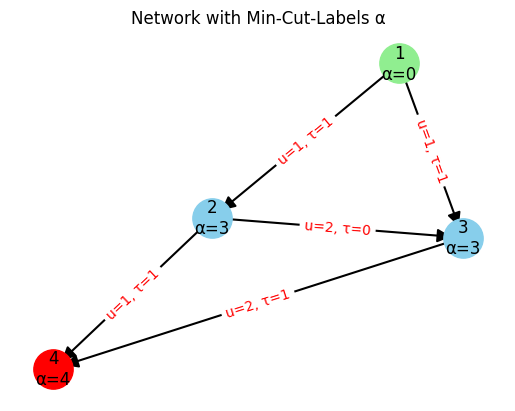

In [4]:
# Create the graph and display the Min-Cut-values
G = create_graph(arcs, capacities, transit_times, alpha=alpha)
visualize_graph(G, sources, sinks)

In [5]:
# Compute "interesting" time points, i.e. all time points of cuts over time for different subsets of terminals
time_points = aggregate_cut_time_points(sources, sinks, arcs, capacities, transit_times, time_horizon)
print('\n\nT~ =', time_points)

Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (win64 - Windows 10.0 (19045.2))

CPU model: AMD Ryzen 7 5700U with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 9 rows, 12 columns and 23 nonzeros
Model fingerprint: 0xbb41c9b9
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+04]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 4e+00]
Presolve removed 5 rows and 7 columns
Presolve time: 0.01s
Presolved: 4 rows, 5 columns, 8 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   5.000000e+00   0.000000e+00      0s
       4    4.0000000e+00   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds (0.00 work units)
Optimal objective  4.000000000e+00
Optimal objective value: 4.0
y[(1, 2)] = 2.0
y[(1, 3)] = 2.0
y[(2, 4)] = 0.0
y[(3, 4)] = 0.0
y[(2, 3)] = 0.0
y[('psi', 1)

Construct the following:
- Nodes $V^{\overset{\sim}{T}} = \{v^\alpha : \alpha \in \overset{\sim}{T}, v\in V\}$
- "upward" arcs $A_{\infty}$
- arcs $A_{<\infty}$

In [6]:
nodes = list(set([node for arc in arcs for node in arc]))
nodes_T_tilde = [f'{node}^{t}' for node, t in itertools.product(nodes, time_points)]
#print(nodes_T_tilde)
A_inf, capacities_inf, transit_times_inf = create_A_inf(nodes, time_points)
df_inf = pd.DataFrame({
    'v': [arc[0] for arc in A_inf],
    'w': [arc[1] for arc in A_inf],
    'capacity': [capacities_inf[arc] for arc in A_inf],
    'transit_time': [transit_times_inf[arc] for arc in A_inf]
})
print('A_inf')
df_inf

A_inf


,v,w,capacity,transit_time
0,1^0,1^3,10000,3
1,1^3,1^4,10000,1
2,2^0,2^3,10000,3
3,2^3,2^4,10000,1
4,3^0,3^3,10000,3
5,3^3,3^4,10000,1
6,4^0,4^3,10000,3
7,4^3,4^4,10000,1


In [7]:
nodes = list(set([node for arc in arcs for node in arc]))
nodes_T_tilde = [f'{node}^{t}' for node, t in itertools.product(nodes, time_points)]
#print(nodes_T_tilde)
A_inf, capacities_inf, lengths_inf = create_A_inf(nodes, time_points)
df_inf = pd.DataFrame({
    'v': [arc[0] for arc in A_inf],
    'w': [arc[1] for arc in A_inf],
    'capacity': [capacities_inf[arc] for arc in A_inf],
    'length': [lengths_inf[arc] for arc in A_inf]
})
print('A_inf')
df_inf

A_inf


,v,w,capacity,length
0,1^0,1^3,10000,3
1,1^3,1^4,10000,1
2,2^0,2^3,10000,3
3,2^3,2^4,10000,1
4,3^0,3^3,10000,3
5,3^3,3^4,10000,1
6,4^0,4^3,10000,3
7,4^3,4^4,10000,1


In [8]:
def create_A_fin(arcs, time_points, original_capacities, original_transit_times):
    
    A_fin = []
    new_capacities = {}
    original_capacities_dict = {}
    original_transit_times_dict = {}
    length = {}
    for arc in arcs:
        v, w = arc
        for i in range(len(time_points)):
            vi = f'{v}^{time_points[i]}'
            for j in range(i,len(time_points)):

                wj = f'{w}^{time_points[j]}'
                A_fin.append((vi,wj))

                new_capacities[(vi,wj)] = 0
                length[(vi,wj)] = time_points[j]-time_points[i]
                original_capacities_dict[(vi,wj)] = original_capacities[v,w]
                original_transit_times_dict[(vi,wj)] = original_transit_times[v,w]
    return A_fin, new_capacities, length, original_capacities_dict, original_transit_times_dict

A_fin, capacities_fin, lengths_fin, original_capacities, original_transit_times = create_A_fin(arcs, time_points, capacities, transit_times)
df_fin = pd.DataFrame({
    'v': [arc[0] for arc in A_fin],
    'w': [arc[1] for arc in A_fin],
    'capacity': [capacities_fin[arc] for arc in A_fin],
    'length': [lengths_fin[arc] for arc in A_fin],
    'original_capacity': [original_capacities[arc] for arc in A_fin],
    'original_transit_time': [original_transit_times[arc] for arc in A_fin]
})
print('A_fin')
df_fin

A_fin


,v,w,capacity,length,original_capacity,original_transit_time
0,1^0,2^0,0,0,1,1
1,1^0,2^3,0,3,1,1
2,1^0,2^4,0,4,1,1
3,1^3,2^3,0,0,1,1
4,1^3,2^4,0,1,1,1
5,1^4,2^4,0,0,1,1
6,1^0,3^0,0,0,1,1
7,1^0,3^3,0,3,1,1
8,1^0,3^4,0,4,1,1
9,1^3,3^3,0,0,1,1


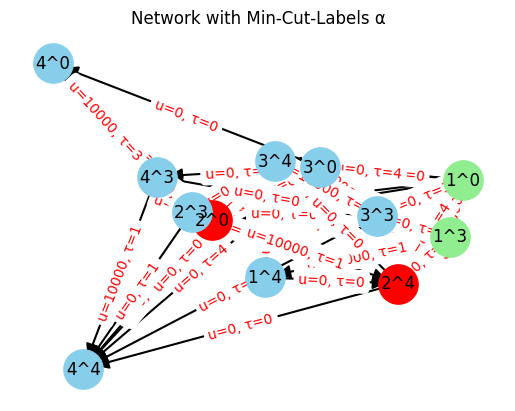

U_1: ['1^0', '1^3']
U_2: ['2^4', '2^0']

Cut from U_1 to U_2:  [('1^3', '2^4'), ('1^0', '2^0'), ('1^0', '2^4')]


In [9]:
from auxiliary_functions.networkx_utilities import create_graph

def find_cut_edges(graph, set_from, set_to):
    """
    Finds the edges in the graph that leave `set_from` and enter `set_to`.
    
    Parameters:
    graph (networkx.DiGraph): A directed graph.
    set_from (set): Set of nodes representing V_v^i \ V_v^{j+1}.
    set_to (set): Set of nodes representing V_w^i \ V_w^{j+1}.
    
    Returns:
    list: A list of distinct edges (tuples) that leave `set_from` and enter `set_to`.
    """
    cut_edges = []
    for node_from in set_from:
        for neighbor in graph.successors(node_from):
            if neighbor in set_to:
                cut_edges.append((node_from, neighbor))
    # Return distinct edges from the cut 
    return list(set(cut_edges))

G_ext = create_graph(A_inf+A_fin, capacities_inf | capacities_fin, transit_times_inf | lengths_fin)
U_1 = ['1^0', '1^3']
U_2 = ['2^4', '2^0']
visualize_graph(G_ext, U_1, U_2)
print('U_1:', U_1)
print('U_2:', U_2)
print('\nCut from U_1 to U_2: ', find_cut_edges(G_ext, U_1, U_2))


In [10]:
df_ext = pd.concat([df_inf,df_fin])
df_ext

,v,w,capacity,length,original_capacity,original_transit_time
0,1^0,1^3,10000,3,NaN,NaN
1,1^3,1^4,10000,1,NaN,NaN
2,2^0,2^3,10000,3,NaN,NaN
3,2^3,2^4,10000,1,NaN,NaN
4,3^0,3^3,10000,3,NaN,NaN
5,3^3,3^4,10000,1,NaN,NaN
6,4^0,4^3,10000,3,NaN,NaN
7,4^3,4^4,10000,1,NaN,NaN
0,1^0,2^0,0,0,1.0,1.0
1,1^0,2^3,0,3,1.0,1.0


In [11]:

def cut_capacity(graph, set_from, set_to):
    """
    Computes the capacity of a cut in a directed graph.

    Parameters:
    graph (networkx.DiGraph): A directed graph where each edge has a 'capacity' attribute.
    set_from (set): Set of nodes on one side of the cut.
    set_to (set): Set of nodes on the other side of the cut.

    Returns:
    int or float: The total capacity of edges crossing from set_s to set_t.
    """
    # Make sure, each node is only contained once in the sets set_from and set_to
    set_from = list(set(set_from))
    set_to = list(set(set_to))

    cut_capacity = 0
    for u in set_from:
        for v in graph.successors(u):
            if v in set_to:
                cut_capacity += graph[u][v].get('capacity', 0)
    return cut_capacity

cut_capacity(G_ext, ['1^0'],['3^3'])

0

In [12]:

def calculate_u(v_i, w_i1, u_a, alpha, tau_a, j, i, ell, lookup):
    """
    Calculates u for the given parameters.

    Parameters:
    v_i, w_i1 : Not used directly in calculation, assumed for completeness
    u_a : Constant or variable for u
    alpha : List or dict holding alpha values
    tau_a : Constant or variable for tau
    j, i : Indices for lookup
    ell : Offset for alpha and lookup
    lookup : 2D list or dict for [j, i + ell]_a term

    Returns:
    float : The calculated u value.
    """
    # Access the required alpha values
    alpha_i = alpha[i]
    alpha_i_ell_1 = alpha[i + ell + 1]
    
    # Calculate the max term
    max_term = max(0, u_a * (alpha_i_ell_1 - alpha_i - tau_a))
    
    # Lookup term
    lookup_term = lookup[j][i + ell]
    
    # Final calculation
    u_value = max_term - lookup_term
    return u_value



def get_time_level(strings):
    """
    Extracts the time level (number after the caret '^') from each string in the list.

    Parameters:
    strings (list): List of strings in the form 'node^number'.

    Returns:
    list: List of time levels (numbers) extracted after the caret (^) in each string.
    """
    time_levels = [int(s.split('^')[1]) for s in strings]
    return time_levels


In [13]:
# Loop over window lengths (windows with length l+1 contain arcs of lenght <= l)
# Therefore, we directly loop over arcs of length <= l

df_fin['alpha_v'] = get_time_level(df_fin['v'])
df_fin['alpha_w'] = get_time_level(df_fin['w'])

# Create two dctionaries assigning to each alpha-value (time point) the number of its coresponding time layer and vice versa
alpha_to_index = {time: idx + 1 for idx, time in enumerate(time_points)}
index_to_alpha = dict(enumerate(time_points, start=1))

df_fin['time_level_nr_v'] = df_fin['alpha_v'].map(alpha_to_index)
df_fin['time_level_nr_w'] = df_fin['alpha_w'].map(alpha_to_index)

# Set capacities for arcs of length 0
#len_is_0 = df_fin['transit_time'] == 0
#df_fin[len_is_0]['capacity'] = max(0, )

df_fin

# # Calculate the difference in alpha values and subtract tau
#alpha_diff = alpha[i + 1] - alpha[i] - tau_vw

#list(time_point_layer_dict.values())
df_fin


# # Calculate the maximum term as per the formula
#u_vw_i = max(0, u_vw * alpha_diff)


# for length in range(len(time_points)-1):
#     arcs = df_fin[df_fin['transit_time']==i]

,v,w,capacity,length,original_capacity,original_transit_time,alpha_v,alpha_w,time_level_nr_v,time_level_nr_w
0,1^0,2^0,0,0,1,1,0,0,1,1
1,1^0,2^3,0,3,1,1,0,3,1,2
2,1^0,2^4,0,4,1,1,0,4,1,3
3,1^3,2^3,0,0,1,1,3,3,2,2
4,1^3,2^4,0,1,1,1,3,4,2,3
5,1^4,2^4,0,0,1,1,4,4,3,3
6,1^0,3^0,0,0,1,1,0,0,1,1
7,1^0,3^3,0,3,1,1,0,3,1,2
8,1^0,3^4,0,4,1,1,0,4,1,3
9,1^3,3^3,0,0,1,1,3,3,2,2


In [29]:
# Set capacities for arcs of length 0
def calculate_capacity(row):
    # Only apply the formula if length is 0
    if (row['length'] == 0) and (row['alpha_v']  < time_horizon):
        #print(list(row))
        return_val = max(0, row['original_capacity'] * (index_to_alpha[row['time_level_nr_v'] + 1] - row['alpha_v'] - row['original_transit_time']))
        #print(f"""{row['original_capacity']} * ({index_to_alpha[row['time_level_nr_v'] + 1]} - {row['alpha_v']} - {row['original_transit_time']})  = {return_val}""")
        return return_val
    else:
        return row['capacity']  # Or another default value if needed

# Apply the function row-wise and assign the result to a new column
df_fin['modified_capacity'] = df_fin.apply(calculate_capacity, axis=1)


df_fin


,v,w,capacity,length,original_capacity,original_transit_time,alpha_v,alpha_w,time_level_nr_v,time_level_nr_w,modified_capacity
0,1^0,2^0,0,0,1,1,0,0,1,1,2
1,1^0,2^3,0,3,1,1,0,3,1,2,0
2,1^0,2^4,0,4,1,1,0,4,1,3,0
3,1^3,2^3,0,0,1,1,3,3,2,2,0
4,1^3,2^4,0,1,1,1,3,4,2,3,0
5,1^4,2^4,0,0,1,1,4,4,3,3,0
6,1^0,3^0,0,0,1,1,0,0,1,1,2
7,1^0,3^3,0,3,1,1,0,3,1,2,0
8,1^0,3^4,0,4,1,1,0,4,1,3,0
9,1^3,3^3,0,0,1,1,3,3,2,2,0


In [26]:
#print(df_fin.columns)
def calculate_capacity(row):
    # Only apply the formula if transit_time is 0
    if (row['length'] == 0) and (row['alpha_v']  < time_horizon):
        #print(list(row))
        return_val = max(0, row['original_capacity'] * (index_to_alpha[row['time_level_nr_v'] + 1] - row['alpha_v'] - row['original_transit_time']))
        #print(f"""{row['original_capacity']} * ({index_to_alpha[row['time_level_nr_v'] + 1]} - {row['alpha_v']} - {row['original_transit_time']})  = {return_val}""")
        return return_val
    else:
        return row['capacity']  # Or another default value if needed

# Apply the function row-wise and assign the result to a new column
df_fin['modified_capacity'] = df_fin.apply(calculate_capacity, axis=1)


df_fin[df_fin.modified_capacity != 0]

,v,w,capacity,length,original_capacity,original_transit_time,alpha_v,alpha_w,time_level_nr_v,time_level_nr_w,modified_capacity
0,1^0,2^0,0,0,1,1,0,0,1,1,2
6,1^0,3^0,0,0,1,1,0,0,1,1,2
12,2^0,4^0,0,0,1,1,0,0,1,1,2
18,3^0,4^0,0,0,2,1,0,0,1,1,4
24,2^0,3^0,0,0,2,0,0,0,1,1,6
27,2^3,3^3,0,0,2,0,3,3,2,2,2


Loop over window lengths (windows with length l contain arcs of lenght <= l-1)
Therefore, we can directly loop over arcs of length l-1